# Parte 1: Introdução ao Aprendizado Profundo

## O Perceptron: A Pedra Fundamental das Redes Neurais

### Teoria do Perceptron

O **Perceptron** foi introduzido por **Frank Rosenblatt** em 1958, representando o conceito mais simples de uma rede neural artificial. Ele foi projetado para classificar entradas binárias em duas possíveis saídas, fazendo dele um classificador binário linear. O funcionamento do Perceptron é baseado na soma ponderada de suas entradas, seguida pela aplicação de uma função de ativação, geralmente uma função degrau, para produzir uma saída 0 ou 1.

A fórmula do Perceptron é dada por:

$$ f(x) = \begin{cases}
      1 & \text{se } w \cdot x + b > 0 \\
      0 & \text{caso contrário}
   \end{cases}
$$

onde:
- $x$ é o vetor de entrada,
- $w$ é o vetor de pesos,
- $b$ é o viés (bias),
- $w \cdot x$ é o produto escalar de $w$ e $x$.

### Implementação do Perceptron em Python

Vamos ilustrar a implementação de um Perceptron simples em Python que aprende a classificar entradas simples.

```
python  
import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        # Inicializador da classe Perceptron
        # no_of_inputs: Número de entradas para o perceptron (não inclui o bias)
        # threshold: Número máximo de iterações para o treinamento
        # learning_rate: Taxa de aprendizado, ajusta a magnitude da atualização dos pesos em cada passo
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1) # Inicializa os pesos como zeros, +1 para o peso do bias

    def predict(self, inputs):
        # Realiza a predição de classificação binária
        # inputs: entradas para o perceptron
        # Retorna 1 se a soma ponderada for positiva, e 0 caso contrário
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0
        return activation

    def train2(self, training_inputs, labels):
        # Método alternativo de treinamento (não utilizado no exemplo)
        # training_inputs: matriz de entradas de treinamento
        # labels: rótulos reais para cada entrada
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

    def train(self, training_inputs, labels):
        # Treina o perceptron
        # Atualiza os pesos com base no erro entre a predição e o rótulo real
        i = 0
        for epoca in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                if update != 0:
                    self.weights[1:] += update * inputs
                    self.weights[0] += update
                    print(f"Época {epoca}, iteração{i}, pesos atualizados: {self.weights}") # Imprime os pesos sempre que são atualizados
                    i+=1

# Função para plotar o gráfico do limite de decisão
def plot_decision_boundary(X, y, model):
    # Plota o gráfico de decisão do Perceptron
    # X: entradas de treinamento
    # y: rótulos de treinamento
    # model: instância do Perceptron treinada
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
    # Cria uma malha de pontos para avaliar o modelo
    xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01),
                         np.arange(ymin, ymax, 0.01))

    # Prediz o rótulo para cada ponto na malha
    Z = np.array([model.predict(i) for i in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    # Preenche o gráfico com cores representando a classificação
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Entrada 1')
    plt.ylabel('Entrada 2')
    plt.title('Gráfico de Decisão do Perceptron')
```
## Treinamento

A atualização dos pesos é diretamente proporcional à entrada correspondente a esse peso. Portanto, se a entrada for zero, não haverá alteração no peso durante aquela iteração específica, independentemente do erro. Isso destaca a importância das características (ou entradas) no treinamento de modelos baseados em perceptron: elas direcionam como os pesos são ajustados e, portanto, como o modelo aprende a partir dos dados.

A regra de atualização para o peso $ w_i $ de uma característica $ i $ é dada por:

$ w_i \leftarrow w_i + \Delta w_i $

onde:

$ \Delta w_i = \eta (y - \hat{y}) x_i $

E:

- $ \eta $ é a taxa de aprendizagem.
- $ y $ é a etiqueta real.
- $ \hat{y} $ é a previsão.
- $x_i $ é o valor da entrada correspondente ao peso $ w_i $.

Essa abordagem assegura que o modelo ajusta seus pesos baseando-se não apenas no quanto a previsão estava errada, mas também no valor da entrada que contribuiu para essa previsão.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        # Inicializador da classe Perceptron
        # no_of_inputs: Número de entradas para o perceptron (não inclui o bias)
        # threshold: Número máximo de iterações para o treinamento
        # learning_rate: Taxa de aprendizado, ajusta a magnitude da atualização dos pesos em cada passo
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1) # Inicializa os pesos como zeros, +1 para o peso do bias

    def predict(self, inputs):
        # Realiza a predição de classificação binária
        # inputs: entradas para o perceptron
        # Retorna 1 se a soma ponderada for positiva, e 0 caso contrário
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0
        return activation

    def train2(self, training_inputs, labels):
        # Método alternativo de treinamento (não utilizado no exemplo)
        # training_inputs: matriz de entradas de treinamento
        # labels: rótulos reais para cada entrada
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

    def train(self, training_inputs, labels):
        # Treina o perceptron
        # Atualiza os pesos com base no erro entre a predição e o rótulo real
        i = 0
        for epoca in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                if update != 0:
                    self.weights[1:] += update * inputs
                    self.weights[0] += update
                    print(f"Época {epoca}, iteração{i}, pesos atualizados: {self.weights}") # Imprime os pesos sempre que são atualizados
                    i+=1

# Função para plotar o gráfico do limite de decisão
def plot_decision_boundary(X, y, model):
    # Plota o gráfico de decisão do Perceptron
    # X: entradas de treinamento
    # y: rótulos de treinamento
    # model: instância do Perceptron treinada
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)
    # Cria uma malha de pontos para avaliar o modelo
    xmin, xmax = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymin, ymax = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01),
                         np.arange(ymin, ymax, 0.01))

    # Prediz o rótulo para cada ponto na malha
    Z = np.array([model.predict(i) for i in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)
    # Preenche o gráfico com cores representando a classificação
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Entrada 1')
    plt.ylabel('Entrada 2')
    plt.title('Gráfico de Decisão do Perceptron')

Época 0, iteração0, pesos atualizados: [0.01 0.01 0.01]
Época 1, iteração1, pesos atualizados: [0.   0.01 0.01]
Época 1, iteração2, pesos atualizados: [-0.01  0.01  0.  ]
Época 1, iteração3, pesos atualizados: [0.   0.02 0.01]
Época 2, iteração4, pesos atualizados: [-0.01  0.02  0.  ]
Época 2, iteração5, pesos atualizados: [-0.02  0.01  0.  ]
Época 2, iteração6, pesos atualizados: [-0.01  0.02  0.01]
Época 3, iteração7, pesos atualizados: [-0.02  0.01  0.01]
Época 3, iteração8, pesos atualizados: [-0.01  0.02  0.02]
Época 4, iteração9, pesos atualizados: [-0.02  0.02  0.01]


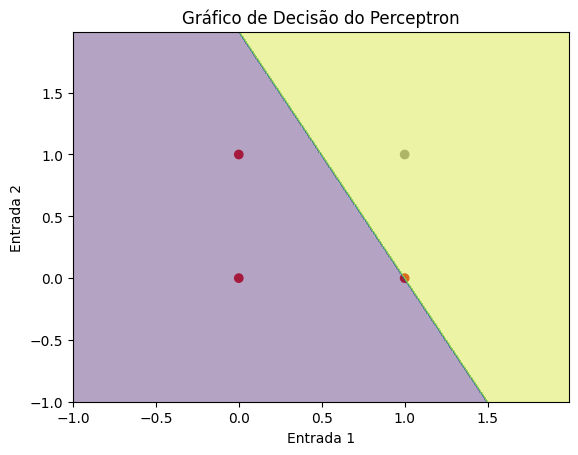

In [2]:
# AND

# Dados de treinamento simples
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 0, 0, 1])

# Instancia, treina e plota o gráfico de decisão do Perceptron
perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)
plot_decision_boundary(training_inputs, labels, perceptron)
plt.show()  # Mostra o gráfico de decisão

Época 0, iteração0, pesos atualizados: [0.01 0.   0.01]
Época 1, iteração1, pesos atualizados: [0.   0.   0.01]
Época 1, iteração2, pesos atualizados: [0.01 0.01 0.01]
Época 2, iteração3, pesos atualizados: [0.   0.01 0.01]


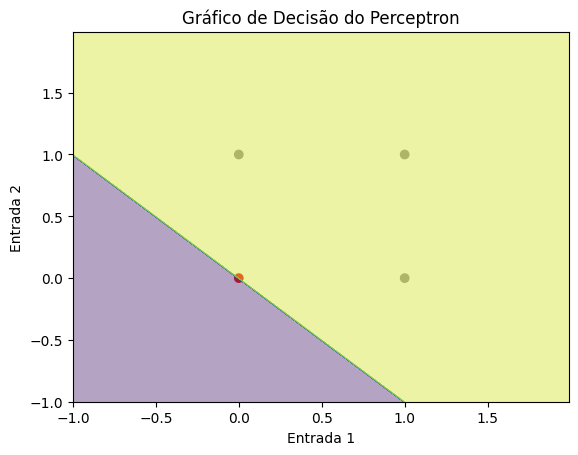

In [3]:
# OR

# Dados de treinamento simples
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 1])

# Instancia, treina e plota o gráfico de decisão do Perceptron
perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)
plot_decision_boundary(training_inputs, labels, perceptron)
plt.show()  # Mostra o gráfico de decisão

Época 0, iteração0, pesos atualizados: [0.01 0.   0.01]
Época 0, iteração1, pesos atualizados: [ 0.   -0.01  0.  ]
Época 1, iteração2, pesos atualizados: [ 0.01 -0.01  0.01]
Época 1, iteração3, pesos atualizados: [0.02 0.   0.01]
Época 1, iteração4, pesos atualizados: [ 0.01 -0.01  0.  ]
Época 2, iteração5, pesos atualizados: [ 0.   -0.01  0.  ]
Época 2, iteração6, pesos atualizados: [ 0.01 -0.01  0.01]
Época 2, iteração7, pesos atualizados: [0.02 0.   0.01]
Época 2, iteração8, pesos atualizados: [ 0.01 -0.01  0.  ]
Época 3, iteração9, pesos atualizados: [ 0.   -0.01  0.  ]
Época 3, iteração10, pesos atualizados: [ 0.01 -0.01  0.01]
Época 3, iteração11, pesos atualizados: [0.02 0.   0.01]
Época 3, iteração12, pesos atualizados: [ 0.01 -0.01  0.  ]
Época 4, iteração13, pesos atualizados: [ 0.   -0.01  0.  ]
Época 4, iteração14, pesos atualizados: [ 0.01 -0.01  0.01]
Época 4, iteração15, pesos atualizados: [0.02 0.   0.01]
Época 4, iteração16, pesos atualizados: [ 0.01 -0.01  0.  ]
Época

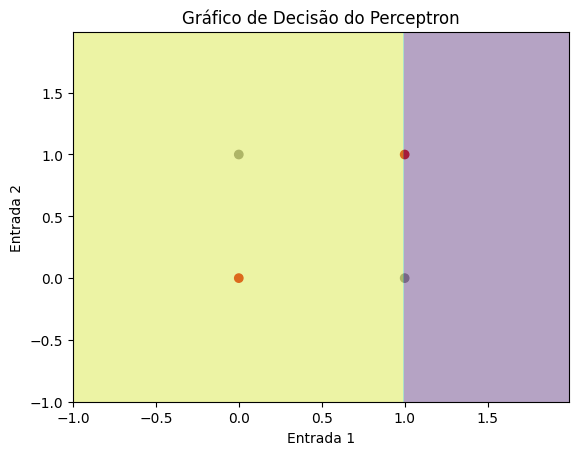

In [4]:
# XOR

# Dados de treinamento simples
training_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
labels = np.array([0, 1, 1, 0])

# Instancia, treina e plota o gráfico de decisão do Perceptron
perceptron = Perceptron(2)
perceptron.train(training_inputs, labels)
plot_decision_boundary(training_inputs, labels, perceptron)
plt.show()  # Mostra o gráfico de decisão